Note:
*TL;DR*: If you like to get accurate results for section A, mark the below variable as "A" since it then removes outliers for predicting sales well. If you wish accurate results for section B, mark it as False - to include outliers which will be investigated compared to all others in section B. 

*Details:*

*Situation*: Section A and B were two seperate tasks combined into one notebook due to limited time. 

*Complication*: Task A aims to predict sales per store well, while Task B is about investigating underperforming markets; hence, analyzing outliers. As such, we removed outliers in our model in section A, but to investigate outliers, we added them back in by deactivating the outlier removal line. This means that when running the entire notebook, you need to re-run the Pre-Processing (1.3.) either with outlier removal or without. This could be seperated but for the sake of time in the hackathon, was kept this way. 

Fix: If you like accurate results in section A, i.e., a well-performing model, mark below variable as "A". For section B, mark it as "B".

In [327]:
RUN_CODE_FOR_SECTION = "A" # Label either as A or B when running the entire notebook, depending on which section should get accurate results

**Table of contents**<a id='toc0_'></a>    
- 1. [🛒 Analytics Task: Store-Level Sales Prediction for OC&Grocery](#toc1_)    
    - 1.1.1. [📌 Context](#toc1_1_1_)    
    - 1.1.2. [🎯 Objective](#toc1_1_2_)    
    - 1.1.3. [📂 Provided Data](#toc1_1_3_)    
    - 1.1.4. [🧠 Your Task](#toc1_1_4_)    
  - 1.2. [Loading Data](#toc1_2_)    
  - 1.3. [Preprocessing and Feature Preparation](#toc1_3_)    
  - 1.4. [Model A: Linear Regression NEW](#toc1_4_)    
  - 1.5. [Model 2: Random Forest Regressor](#toc1_5_)    
  - 1.6. [Model 3: XGBoost](#toc1_6_)    
  - 1.7. [Predicting New Data](#toc1_7_)    
- 2. [🧩 Strategy Task B: Diagnosing and Turning Around Underperforming Stores](#toc2_)    
    - 2.1.1. [🧭 Objective](#toc2_1_1_)    
    - 2.1.2. [🧠 Your Role](#toc2_1_2_)    
    - 2.1.3. [🧱 Task Structure](#toc2_1_3_)    
      - 2.1.3.1. [🔍 Diagnostic Analysis](#toc2_1_3_1_)    
      - 2.1.3.2. [🚀 Levers & Uplift](#toc2_1_3_2_)    
      - 2.1.3.3. [🧩 Strategy Design](#toc2_1_3_3_)    
    - 2.1.4. [📌 Key Considerations](#toc2_1_4_)    
    - 2.1.5. [Classifying Underperformers](#toc2_1_5_)    
  - 2.2. [Finding signficant differences between underperformers and regular performers](#toc2_2_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. <a id='toc1_'></a>[🛒 Analytics Task: Store-Level Sales Prediction for OC&Grocery](#toc0_)

### 1.1.1. <a id='toc1_1_1_'></a>[📌 Context](#toc0_)
OC&Grocery is a **new client** undergoing a **5-year strategy refresh**. As part of this transformation, they have asked our team at OC&C to help **analyse store-level performance drivers** to support better decision-making.

### 1.1.2. <a id='toc1_1_2_'></a>[🎯 Objective](#toc0_)
The goal is to **predict annual sales at the store level** using provided data on store attributes. These predictions will be used to:

- Improve the **efficiency of the store portfolio**
- Support **strategic expansion** beyond the current store footprint
- Help OC&Grocery **reduce food waste** and enhance **customer satisfaction**

### 1.1.3. <a id='toc1_1_3_'></a>[📂 Provided Data](#toc0_)
You have access to two datasets:
- **Store Data:** Contains various attributes about each store (e.g., location, size, format, etc.)
- **Sales Data:** Provides the **annual sales figures** for each store

> ⚠️ *Not all store attributes will be relevant, part of your task is to determine which features matter most.*

### 1.1.4. <a id='toc1_1_4_'></a>[🧠 Your Task](#toc0_)
1. **Explore and clean** the datasets.
2. **Select relevant features** from the store data.
3. **Train a predictive model** that estimates annual sales for a subset of stores.
4. Evaluate the model's performance and ensure it's suitable for strategic recommendations.

> 📝 **Reminder:** Focus on balancing your time effectively between **Analytics** and **Strategy**. Avoid over-optimizing the model, spend your time wisely.


## 1.2. <a id='toc1_2_'></a>[Loading Data](#toc0_)

In [328]:
# Step 1: Install any required packages (if needed)
# Uncomment if packages dont seem to be installed
# !pip install pandas scikit-learn matplotlib seaborn

# Step 2: Import standard data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 3: Upload files from your local machine
# Make sure to have downloaded them from the Google Drive first!!
#from google.colab import files
# uploaded = files.upload()

# Step 4: Load your CSV files into Pandas DataFrames
# Replace 'store_data.csv' and 'sales_data.csv' with your actual filenames
store_df = pd.read_csv('../../Data/store_data.csv')
sales_df = pd.read_csv('../../Data/sales_data.csv')

# Step 5: Quick look at the data
print("Store data:")
display(store_df.head())

print("\nSales data:")
display(sales_df.head())


Store data:


,store_id,federal_state,store_format,location_type,store_age_years,store_area_sqm,assortment_count,fresh_food_percent,private_label_percent,organic_products_percent,staff_count,weekly_opening_hours,competitors_nearby,population_density,avg_income_area,parking_spaces,renovation_last_years,bakery_section,deli_counter,year
0,1,Bavaria,Hypermarket,Urban Residential,6,3920,15741,32.109906,15.188624,14.509256,25,90,5,2566,115,165,2,True,True,2024
1,2,North Rhine-Westphalia,Supermarket,Urban Center,15,1646,8399,44.633713,35.420685,7.841410,22,87,5,6056,106,35,7,True,True,2024
2,3,Saxony,Discounter,Urban Center,7,1231,2447,20.436180,66.443122,8.191310,6,78,5,4441,92,20,1,True,False,2024
3,4,North Rhine-Westphalia,Supermarket,Suburban,12,1704,9069,42.625427,34.803850,7.218120,23,84,1,1294,93,95,0,True,True,2024
4,5,North Rhine-Westphalia,Supermarket,Suburban,15,1296,6714,43.452243,24.802120,12.301529,15,75,3,1594,110,55,4,True,True,2024



Sales data:


,store_id,annual_sales
0,1,36912697
1,2,20121635
2,3,7140552
3,4,18404739
4,5,16994266


In [329]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   store_id                  3000 non-null   int64  
 1   federal_state             3000 non-null   object 
 2   store_format              3000 non-null   object 
 3   location_type             3000 non-null   object 
 4   store_age_years           3000 non-null   int64  
 5   store_area_sqm            3000 non-null   int64  
 6   assortment_count          3000 non-null   int64  
 7   fresh_food_percent        3000 non-null   float64
 8   private_label_percent     3000 non-null   float64
 9   organic_products_percent  3000 non-null   float64
 10  staff_count               3000 non-null   int64  
 11  weekly_opening_hours      3000 non-null   int64  
 12  competitors_nearby        3000 non-null   int64  
 13  population_density        3000 non-null   int64  
 14  avg_inco

In [330]:
store_df.describe()

,store_id,store_age_years,store_area_sqm,assortment_count,fresh_food_percent,private_label_percent,organic_products_percent,staff_count,weekly_opening_hours,competitors_nearby,population_density,avg_income_area,parking_spaces,renovation_last_years,year
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.0
mean,1611.110333,11.975000,1551.372333,6175.033000,31.470647,40.411797,11.279024,14.137333,79.273333,3.554333,2860.424667,101.404667,50.973333,4.543667,2024.0
std,921.952690,6.773995,889.561789,5028.728703,8.316014,17.310411,5.426194,9.153346,9.574959,1.724347,1728.614398,12.261472,49.056819,4.473116,0.0
min,1.000000,0.000000,321.000000,528.000000,15.001029,10.059507,2.000000,3.000000,60.000000,0.000000,350.000000,70.000000,0.000000,0.000000,2024.0
25%,815.750000,7.000000,978.000000,1980.000000,23.992576,25.646145,6.987832,6.000000,72.000000,2.000000,1427.000000,93.000000,20.000000,0.000000,2024.0
50%,1617.500000,12.000000,1307.000000,3885.000000,30.139165,34.956313,10.465743,11.000000,78.000000,3.000000,2734.500000,102.000000,35.000000,3.000000,2024.0
75%,2409.250000,16.250000,1905.750000,9787.000000,38.990004,57.602183,14.878791,21.000000,84.000000,5.000000,3972.250000,110.000000,65.000000,8.000000,2024.0
max,3200.000000,30.000000,5470.000000,26879.000000,44.966530,69.996186,31.415520,49.000000,110.000000,7.000000,6499.000000,131.000000,340.000000,15.000000,2024.0


In [331]:
store_df["store_format"].value_counts()    

store_format
Supermarket    1201
Discounter     1185
Convenience     311
Hypermarket     303
Name: count, dtype: int64

In [332]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   store_id      3000 non-null   int64
 1   annual_sales  3000 non-null   int64
dtypes: int64(2)
memory usage: 47.0 KB


In [333]:
sales_df.describe()

,store_id,annual_sales
count,3000.000000,3.000000e+03
mean,1611.110333,1.666832e+07
std,921.952690,1.057503e+07
min,1.000000,1.144618e+06
25%,815.750000,1.104478e+07
50%,1617.500000,1.459208e+07
75%,2409.250000,1.989197e+07
max,3200.000000,7.849110e+07


No blank values found and min/max seem to make sense; hence, no immediate action taken.

In [334]:
# Merge store and sales data
df = pd.merge(store_df, sales_df, on='store_id')
print("Merged data shape:", df.shape)

Merged data shape: (3000, 21)


<Axes: xlabel='store_format'>

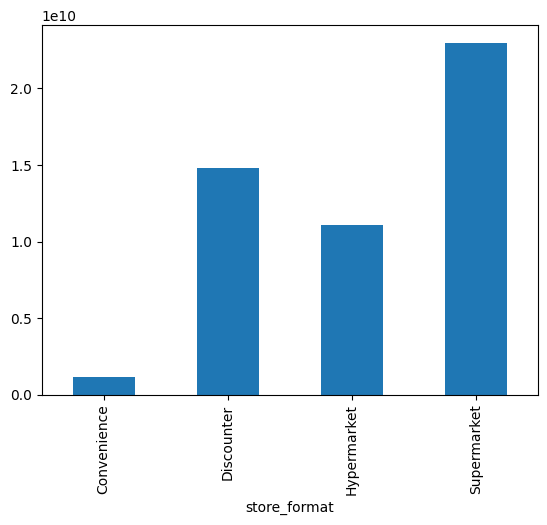

In [335]:
# calculate sum of sales per super market type
df.groupby('store_format')['annual_sales'].sum().plot(kind='bar')

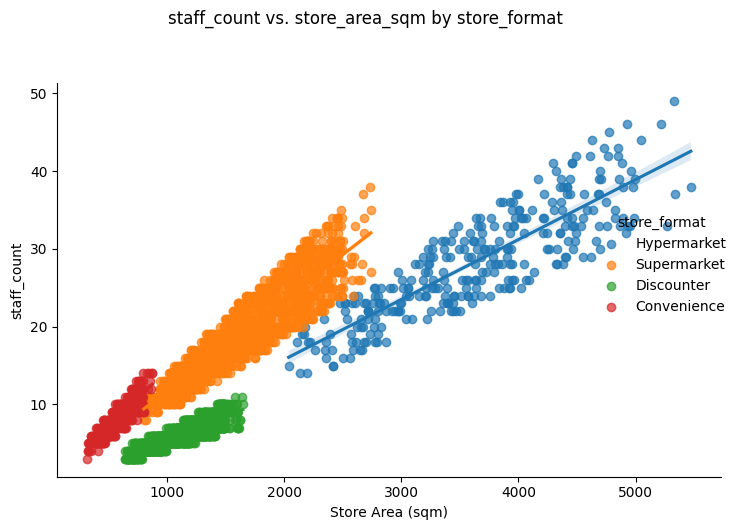

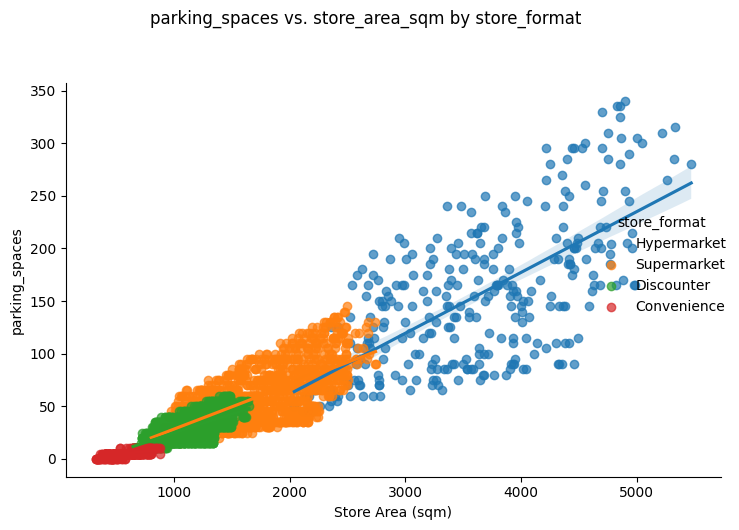

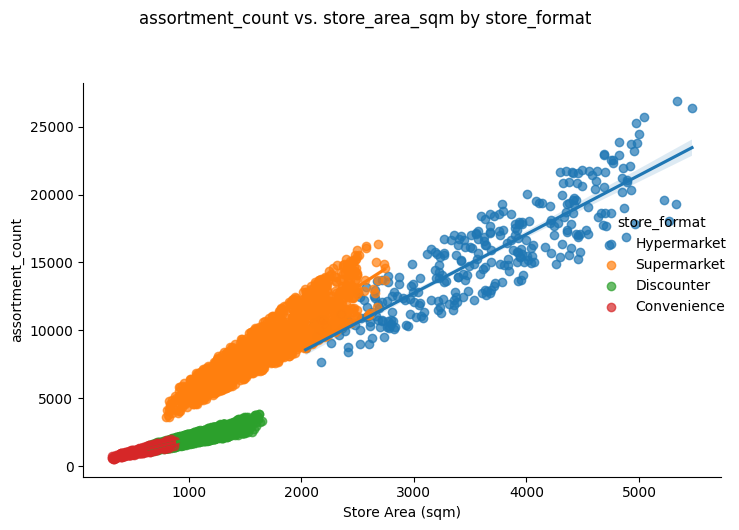

In [336]:
# Checking if we need to add scaling features normalized by area
import seaborn as sns
import matplotlib.pyplot as plt

candidate_vars = ['staff_count', 'parking_spaces', 'assortment_count']
hue_column = 'store_format'  # Replace with your desired column

for var in candidate_vars:
    # lmplot handles figure creation internally, so no need for plt.figure()
    g = sns.lmplot(
        x='store_area_sqm', 
        y=var,
        data=df,
        hue=hue_column,
        aspect=1.2,      # width "aspect ratio" of each plot
        height=5,        # height of the plot
        scatter_kws={"alpha": 0.7} 
    )
    g.set_axis_labels("Store Area (sqm)", var)
    g.fig.suptitle(f"{var} vs. store_area_sqm by {hue_column}", y=1.05)
    plt.tight_layout()
    plt.show()


We will add the columns in the pre-processing below.

## 1.3. <a id='toc1_3_'></a>[Preprocessing and Feature Preparation](#toc0_)

Merged data shape: (3000, 21)


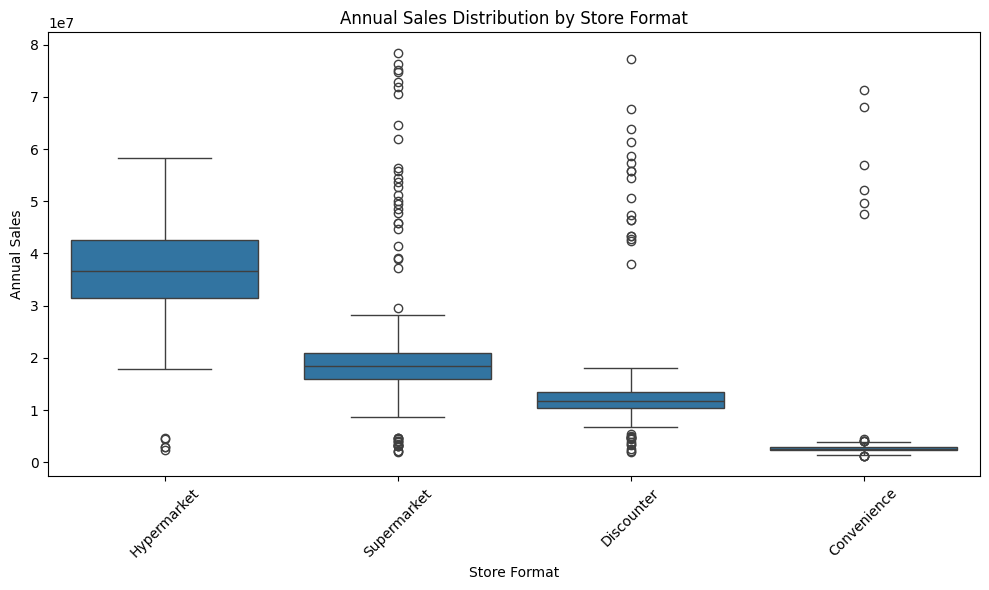

Data shape after outlier removal: (2906, 21)


/var/folders/_j/pxtg33rs3657dcdtz9vydvkc0000gn/T/ipykernel_28049/171847473.py:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('store_format', group_keys=False).apply(remove_outliers)


In [337]:
# --- Preprocessing and Feature Preparation with Conservative Outlier Removal and Ratio Features ---

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Merge store and sales data
df = pd.merge(store_df, sales_df, on='store_id')
print("Merged data shape:", df.shape)

# Step 1: Outlier Analysis and Removal 
# Create a boxplot of Annual Sales by Store Format
plt.figure(figsize=(10, 6))
sns.boxplot(x='store_format', y='annual_sales', data=df)
plt.title("Annual Sales Distribution by Store Format")
plt.xlabel("Store Format")
plt.ylabel("Annual Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Function to remove outliers using the IQR method within each store_format group
def remove_outliers(group):
    Q1 = group['annual_sales'].quantile(0.25)
    Q3 = group['annual_sales'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return group[(group['annual_sales'] >= lower_bound) & (group['annual_sales'] <= upper_bound)]

# Uncomment the next line to remove outliers:
if RUN_CODE_FOR_SECTION == "A":
    df = df.groupby('store_format', group_keys=False).apply(remove_outliers)
else:
    print("Skipping outlier removal for demonstration purposes.")
# Check the shape of the DataFrame after outlier removal
print("Data shape after outlier removal:", df.shape)

# Reset the index so that all subsequent operations have aligned indices
df = df.reset_index(drop=True)

# Step 2: Save store_id (now aligned) before dropping it
store_ids = df['store_id'].copy()

# Step 3: Drop irrelevant columns
df = df.drop(columns=['store_id', 'year'])  # 'year' is always 2024 in this dataset

# Step X: Adding new ratio features
df['staff_per_sqm'] = df['staff_count'] / df['store_area_sqm']
df['parking_spaces_per_sqm'] = df['parking_spaces'] / df['store_area_sqm']
df['assortment_per_sqm'] = df['assortment_count'] / df['store_area_sqm']

# Step 4: One-hot encode categorical columns
categorical_cols = ['federal_state', 'store_format', 'location_type']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Step 5: Split into features and target
X = df.drop(columns=['annual_sales'])
y = df['annual_sales']

# Step 6: Train-test split
X_train, X_test, y_train, y_test, store_ids_train, store_ids_test = train_test_split(
    X, y, store_ids, test_size=0.2, random_state=42
)

# Step 7: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 8: Create DataFrames with feature names (for analysis and plotting)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)


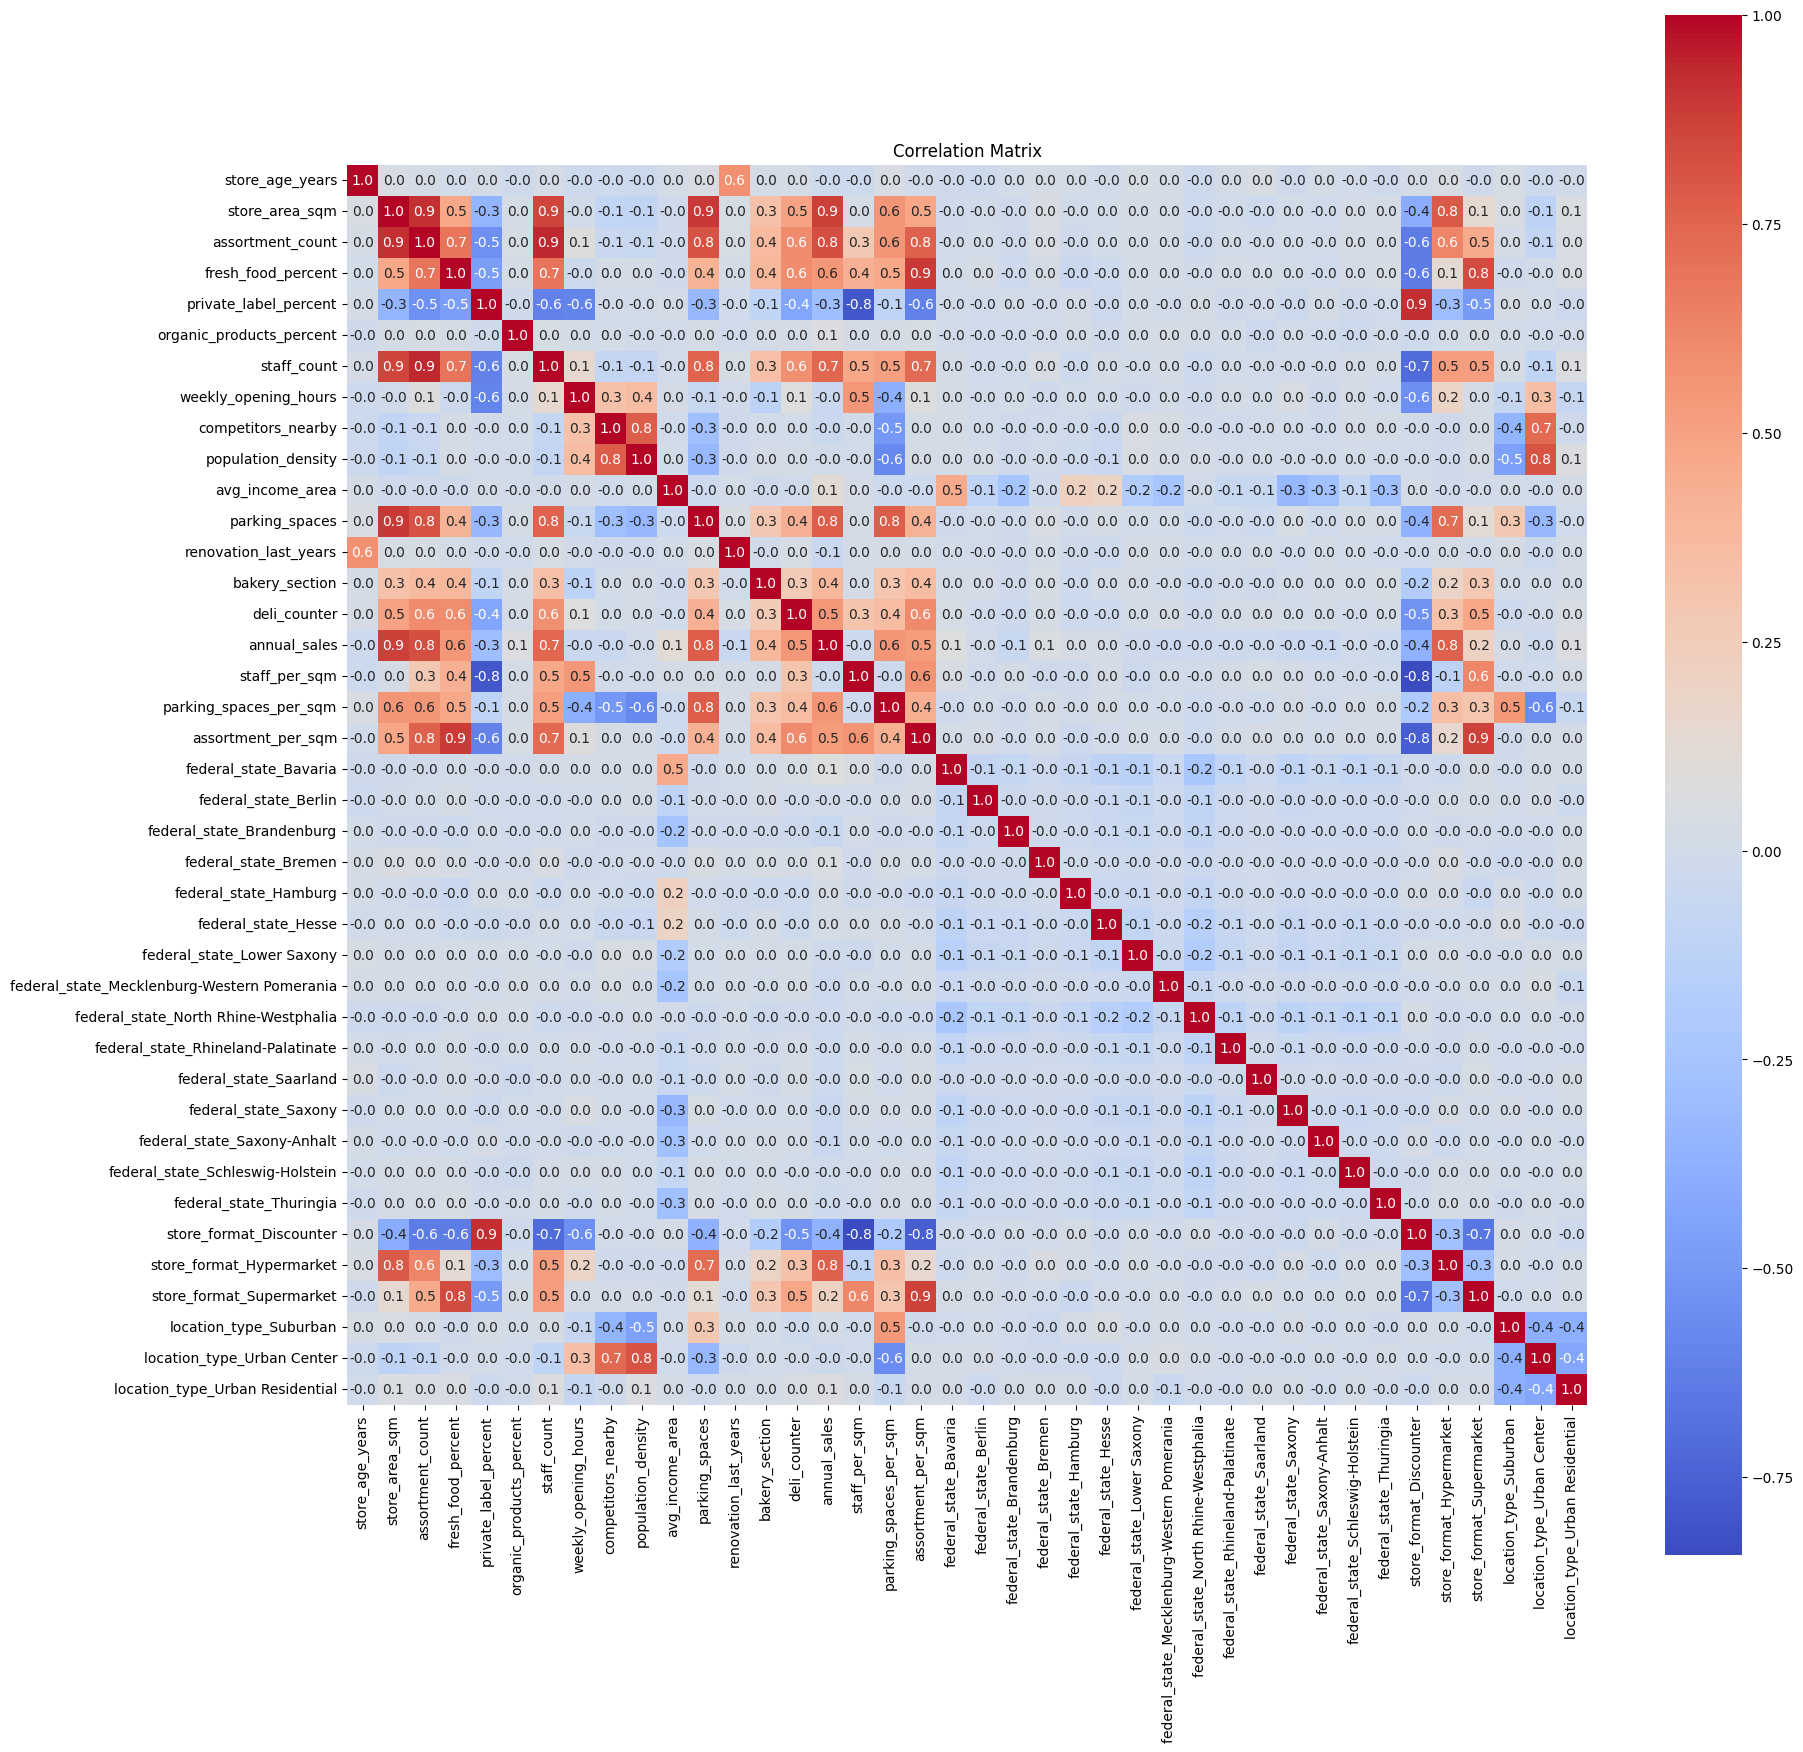

In [338]:
# Show correlation matrix
plt.figure(figsize=(20, 20))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [339]:
# --- Feature Selection and Interaction Terms ---

import numpy as np

# Compute the absolute correlation matrix on the scaled training data
corr_matrix = X_train_scaled_df.corr().abs()

# Get the upper triangle of the correlation matrix (excluding the diagonal)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify columns to drop with any correlation above the threshold (0.9)
threshold = 0.9
columns_to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print("Dropping columns due to high correlation:", columns_to_drop)

# Drop these columns from both training and test scaled DataFrames
X_train_reduced = X_train_scaled_df.drop(columns=columns_to_drop)
X_test_reduced = X_test_scaled_df.drop(columns=columns_to_drop)

# Final split data for modeling
X_train_final = X_train_reduced.copy()
X_test_final = X_test_reduced.copy()

print("Final training data shape:", X_train_final.shape)
print("Final test data shape:", X_test_final.shape)


Dropping columns due to high correlation: ['assortment_count', 'staff_count', 'store_format_Discounter']
Final training data shape: (2324, 36)
Final test data shape: (582, 36)


## 1.4. <a id='toc1_4_'></a>[Model A: Linear Regression NEW](#toc0_)

Linear Regression RMSE: 2,601,246
Linear Regression R² Score: 0.925
Linear Regression Adjusted R² Score: 0.920


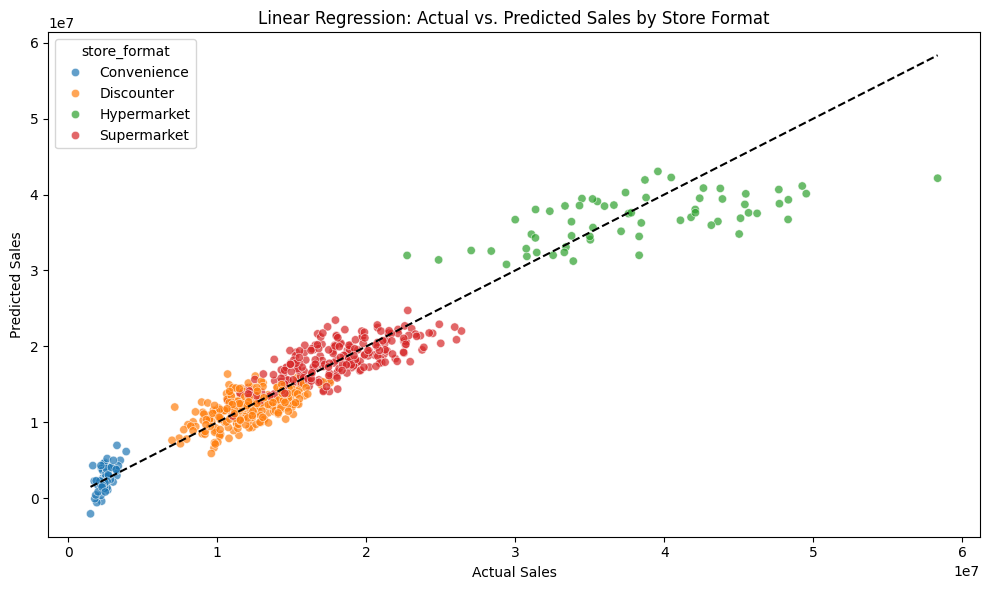

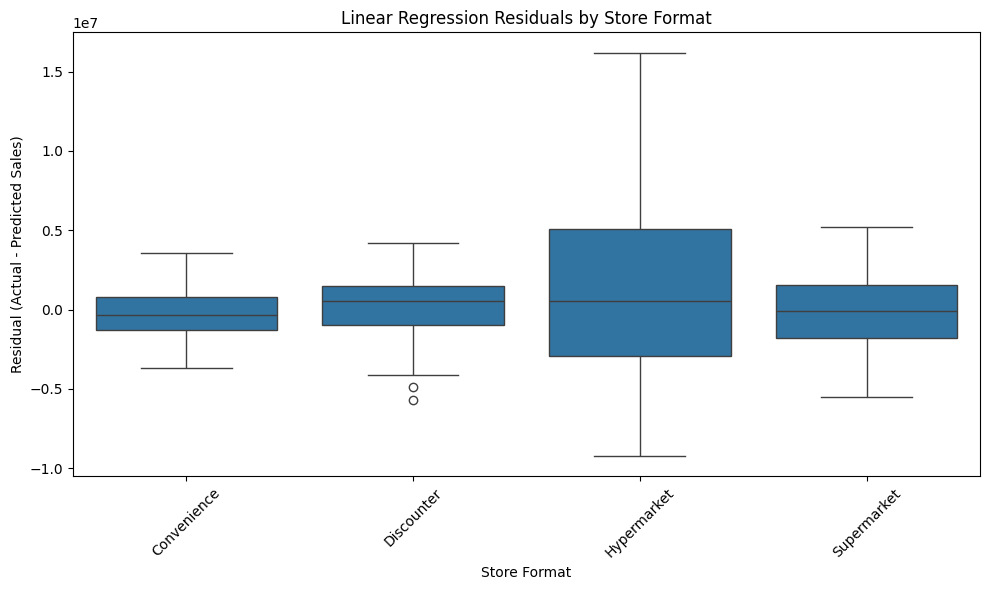

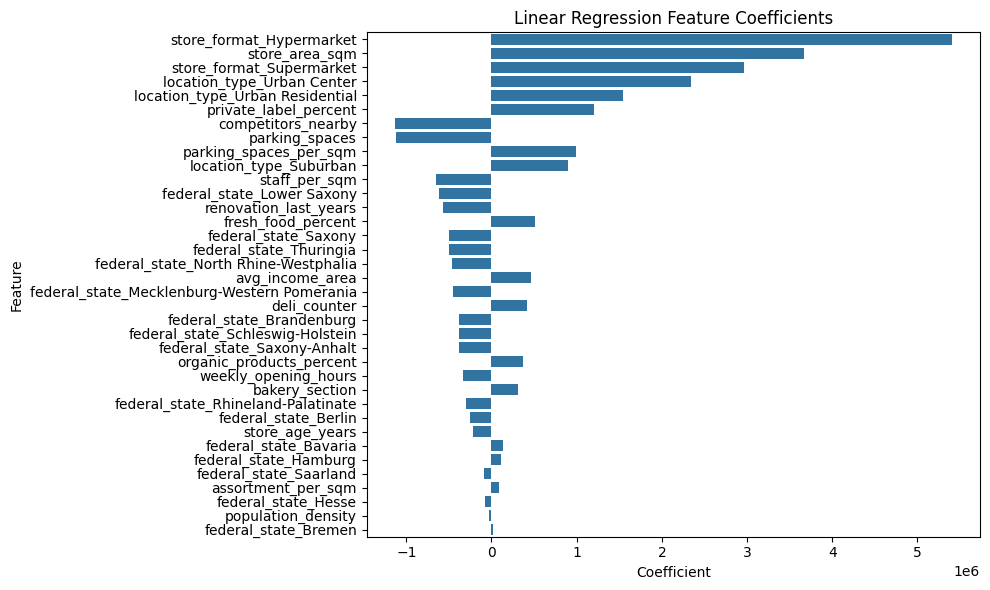

In [340]:
# --- Linear Regression Modeling, Evaluation, and Visualization with Final Splits ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the Linear Regression model on the final training data
lr_model = LinearRegression()
lr_model.fit(X_train_final, y_train)

# Predict on the final test set
y_pred_lr = lr_model.predict(X_test_final)

# Compute performance metrics
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# Calculate Adjusted R²
n = len(y_test)                  # Number of observations
k = X_test_final.shape[1]        # Number of predictors
adjusted_r2_lr = 1 - (1 - r2_lr) * ((n - 1) / (n - k - 1))

print(f"Linear Regression RMSE: {rmse_lr:,.0f}")
print(f"Linear Regression R² Score: {r2_lr:.3f}")
print(f"Linear Regression Adjusted R² Score: {adjusted_r2_lr:.3f}")

# Create a performance DataFrame for linear regression
performance_lr = pd.DataFrame({
    'store_id': store_ids_test.values,
    'Actual_Sales': y_test.values,
    'Predicted_Sales': y_pred_lr
})
performance_lr['Residual'] = performance_lr['Actual_Sales'] - performance_lr['Predicted_Sales']

# Merge with store info to include store_format for visualization
store_info = store_df[['store_id', 'store_format']]
performance_lr_info = performance_lr.merge(store_info, on='store_id', how='left')

# Actual vs. Predicted Sales Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual_Sales', y='Predicted_Sales', hue='store_format',
                data=performance_lr_info, alpha=0.7)
plt.plot([performance_lr_info['Actual_Sales'].min(), performance_lr_info['Actual_Sales'].max()],
         [performance_lr_info['Actual_Sales'].min(), performance_lr_info['Actual_Sales'].max()],
         '--', color='black')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Linear Regression: Actual vs. Predicted Sales by Store Format")
plt.tight_layout()
plt.show()

# Residual Plot by Store Format
plt.figure(figsize=(10, 6))
sns.boxplot(x='store_format', y='Residual', data=performance_lr_info)
plt.title("Linear Regression Residuals by Store Format")
plt.xlabel("Store Format")
plt.ylabel("Residual (Actual - Predicted Sales)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Feature Importance (Coefficients) Plot
features = X_train_final.columns
coef = lr_model.coef_
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coef})
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title("Linear Regression Feature Coefficients")
plt.tight_layout()
plt.show()


## 1.5. <a id='toc1_5_'></a>[Model 2: Random Forest Regressor](#toc0_)

Random Forest RMSE: 2,625,370
Random Forest R² Score: 0.924
Random Forest Adjusted R² Score: 0.919


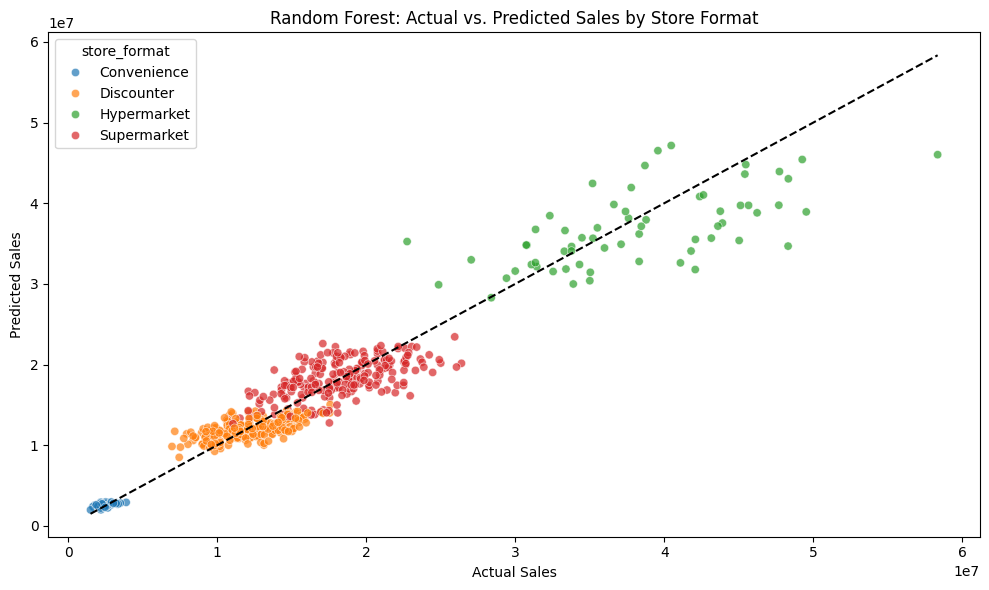

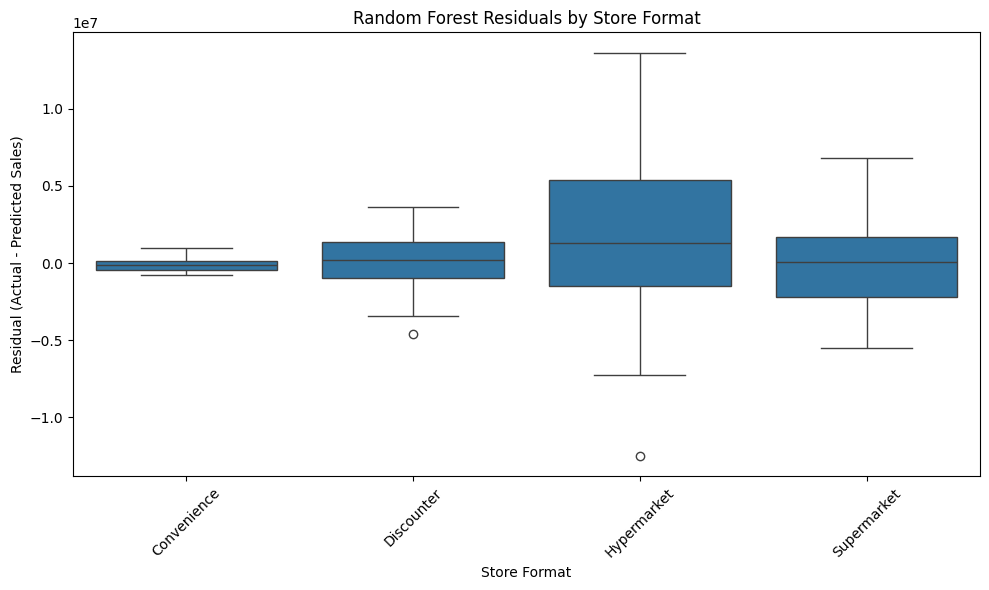

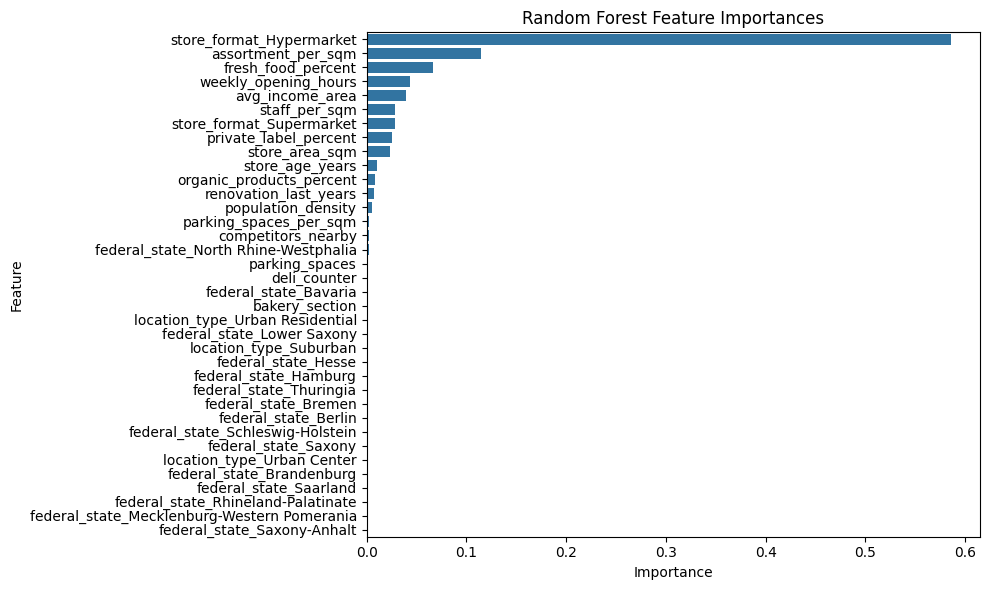

In [341]:
# --- Random Forest Modeling, Evaluation, and Visualization with Updated Splits ---

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Train the Random Forest Regressor on the updated (final) training set
rf_model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10)
rf_model.fit(X_train_final, y_train)

# Predict on test data using the updated final splits
y_pred_rf = rf_model.predict(X_test_final)

# Evaluate model performance
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Calculate Adjusted R²
n = len(y_test)                  # Number of observations
k = X_test_final.shape[1]        # Number of predictors
adjusted_r2_rf = 1 - (1 - r2_rf) * ((n - 1) / (n - k - 1))

print(f"Random Forest RMSE: {rmse_rf:,.0f}")
print(f"Random Forest R² Score: {r2_rf:.3f}")
print(f"Random Forest Adjusted R² Score: {adjusted_r2_rf:.3f}")

# --- Actual vs. Predicted Sales Plot Colored by Store Format ---
# Create a performance DataFrame for Random Forest
performance_rf = pd.DataFrame({
    'store_id': store_ids_test.values,
    'Actual_Sales': y_test.values,
    'Predicted_Sales': y_pred_rf
})
performance_rf['Residual'] = performance_rf['Actual_Sales'] - performance_rf['Predicted_Sales']

# Merge performance with store info to retrieve store_format
store_info = store_df[['store_id', 'store_format']]
performance_rf_info = performance_rf.merge(store_info, on='store_id', how='left')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual_Sales', y='Predicted_Sales',
                hue='store_format', data=performance_rf_info, alpha=0.7)
plt.plot([performance_rf_info['Actual_Sales'].min(), performance_rf_info['Actual_Sales'].max()],
         [performance_rf_info['Actual_Sales'].min(), performance_rf_info['Actual_Sales'].max()],
         '--', color='black')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Random Forest: Actual vs. Predicted Sales by Store Format")
plt.tight_layout()
plt.show()

# --- Residual Plot by Store Format ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='store_format', y='Residual', data=performance_rf_info)
plt.title("Random Forest Residuals by Store Format")
plt.xlabel("Store Format")
plt.ylabel("Residual (Actual - Predicted Sales)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Feature Importance Plot ---
# Use the final training splits feature names
features = X_train_final.columns
importances_rf = rf_model.feature_importances_
imp_df_rf = pd.DataFrame({'Feature': features, 'Importance': importances_rf})
imp_df_rf = imp_df_rf.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=imp_df_rf)
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()


## 1.6. <a id='toc1_6_'></a>[Model 3: XGBoost](#toc0_)

XGBoost RMSE: 2,630,116
XGBoost R² Score: 0.924
XGBoost Adjusted R² Score: 0.918


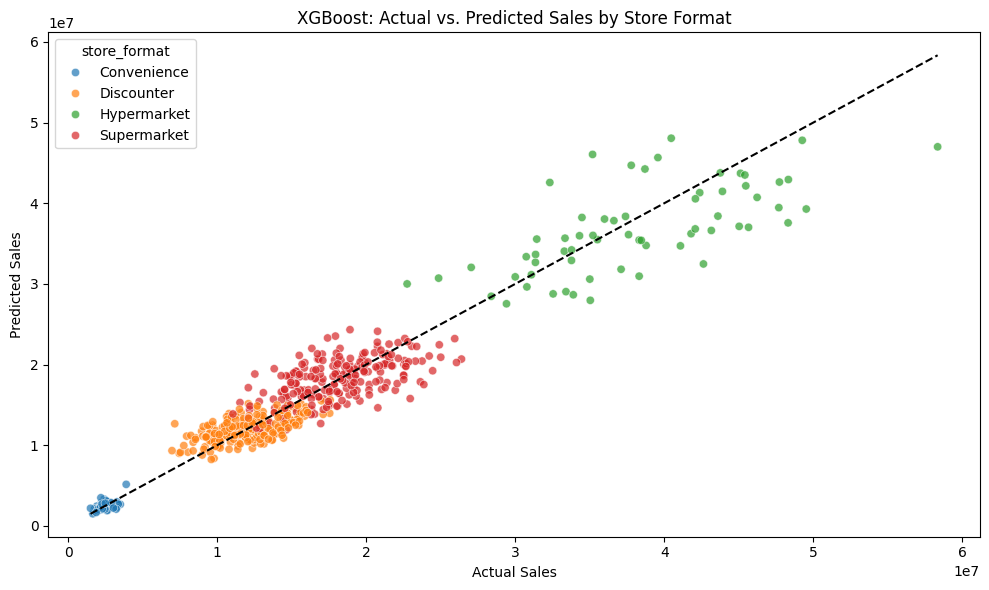

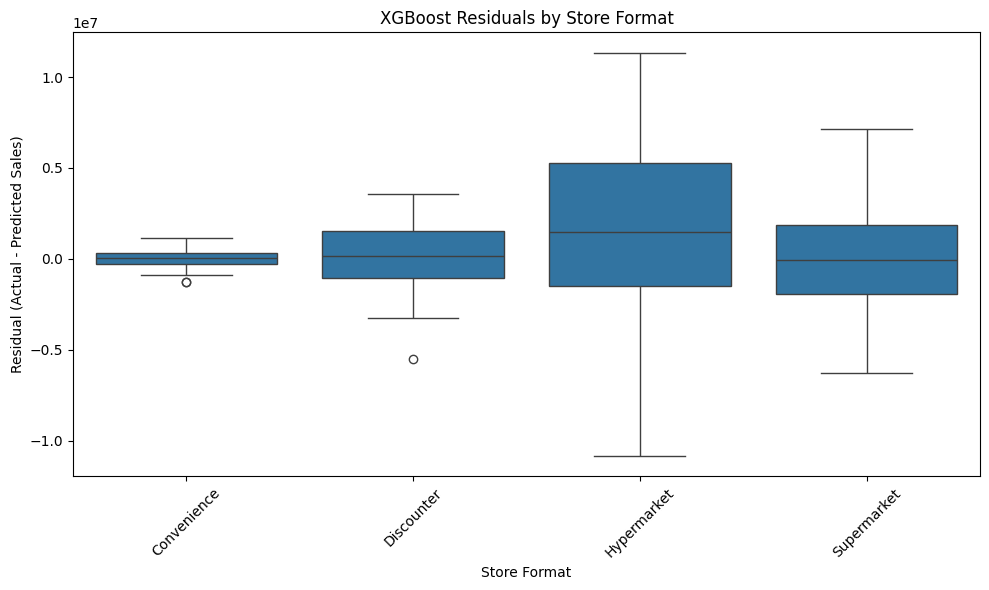

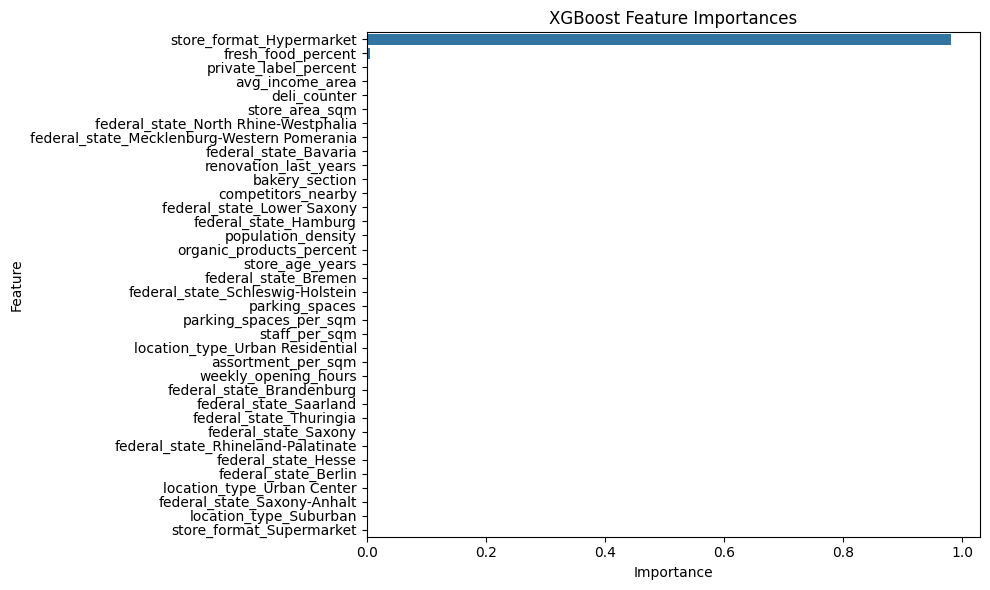

In [342]:
# --- XGBoost Modeling, Evaluation, and Visualization with Updated Splits ---

import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Train the XGBoost Regressor on the updated (final) training set
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train_final, y_train)

# Predict on test data using the updated final splits
y_pred_xgb = xgb_model.predict(X_test_final)

# Evaluate model performance
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

# Calculate Adjusted R²
n = len(y_test)                  # Number of observations
k = X_test_final.shape[1]        # Number of predictors
adjusted_r2_xgb = 1 - (1 - r2_xgb) * ((n - 1) / (n - k - 1))

print(f"XGBoost RMSE: {rmse_xgb:,.0f}")
print(f"XGBoost R² Score: {r2_xgb:.3f}")
print(f"XGBoost Adjusted R² Score: {adjusted_r2_xgb:.3f}")

# --- Actual vs. Predicted Sales Plot Colored by Store Format ---
# Build a performance DataFrame for XGBoost
performance_xgb = pd.DataFrame({
    'store_id': store_ids_test.values,
    'Actual_Sales': y_test.values,
    'Predicted_Sales': y_pred_xgb
})
performance_xgb['Residual'] = performance_xgb['Actual_Sales'] - performance_xgb['Predicted_Sales']

# Merge with store info to get store_format
store_info = store_df[['store_id', 'store_format']]
performance_xgb_info = performance_xgb.merge(store_info, on='store_id', how='left')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual_Sales', y='Predicted_Sales',
                hue='store_format', data=performance_xgb_info, alpha=0.7)
plt.plot([performance_xgb_info['Actual_Sales'].min(), performance_xgb_info['Actual_Sales'].max()],
         [performance_xgb_info['Actual_Sales'].min(), performance_xgb_info['Actual_Sales'].max()],
         '--', color='black')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("XGBoost: Actual vs. Predicted Sales by Store Format")
plt.tight_layout()
plt.show()

# --- Residual Plot by Store Format ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='store_format', y='Residual', data=performance_xgb_info)
plt.title("XGBoost Residuals by Store Format")
plt.xlabel("Store Format")
plt.ylabel("Residual (Actual - Predicted Sales)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Feature Importance Plot ---
# Use the final training set feature names
features = X_train_final.columns
importances_xgb = xgb_model.feature_importances_
imp_df_xgb = pd.DataFrame({'Feature': features, 'Importance': importances_xgb})
imp_df_xgb = imp_df_xgb.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=imp_df_xgb)
plt.title("XGBoost Feature Importances")
plt.tight_layout()
plt.show()


## 1.7. <a id='toc1_7_'></a>[Predicting New Data](#toc0_)

In [343]:
print(f"Linear Regression Adjusted R² Score: {adjusted_r2_lr:.3f}")
print(f"Random Forest Adjusted R² Score: {adjusted_r2_rf:.3f}")
print(f"XGBoost Adjusted R² Score: {adjusted_r2_xgb:.3f}")

Linear Regression Adjusted R² Score: 0.920
Random Forest Adjusted R² Score: 0.919
XGBoost Adjusted R² Score: 0.918


Both linear regression and the Random Forest Regressor share the highest Adjusted R² of 0.920/0,919. Given that the Random Forest Regressor accounts for more exceptional data such as non-linear independent variables (potentially found in test data), we will use this model to predict the sales on given test data.

In [344]:
# --- Predicting Annual Sales for New Test Stores using Random Forest Model with Ratio Features ---

import pandas as pd

# Load test_stores.csv (adjust the filepath as needed)
test_stores_df = pd.read_csv('../../Data/test_stores.csv')

# Preprocessing for test stores:

# 1. Create new ratio features analogous to training
test_stores_df['staff_per_sqm'] = test_stores_df['staff_count'] / test_stores_df['store_area_sqm']
test_stores_df['parking_spaces_per_sqm'] = test_stores_df['parking_spaces'] / test_stores_df['store_area_sqm']
test_stores_df['assortment_per_sqm'] = test_stores_df['assortment_count'] / test_stores_df['store_area_sqm']

# 2. Save store_id (if needed for later merging) and drop irrelevant columns (store_id, year)
store_ids_test_original = test_stores_df['store_id'].copy()  # save store id for output
test_stores_processed = test_stores_df.drop(columns=['store_id', 'year'], errors='ignore')
# (Note: in training, 'year' was dropped because it was constant)

# 3. One-hot encode categorical columns (using the same categories as training)
categorical_cols = ['federal_state', 'store_format', 'location_type']
test_stores_processed = pd.get_dummies(test_stores_processed, columns=categorical_cols, drop_first=True)

# 4. Reindex the test set to include the same feature columns as in your training data (X)
test_stores_processed = test_stores_processed.reindex(columns=X.columns, fill_value=0)

# 5. Scale the features using the same scaler fitted on the training data
X_test_stores_scaled = scaler.transform(test_stores_processed)
X_test_stores_scaled_df = pd.DataFrame(X_test_stores_scaled, columns=X.columns)

# 6. Drop the same highly correlated features (columns_to_drop) as determined from training
X_test_reduced = X_test_stores_scaled_df.drop(columns=columns_to_drop)

# Final preprocessed test features for prediction
X_test_final_pred = X_test_reduced.copy()

# 7. Predict using the Random Forest model (rf_model) trained earlier
predicted_sales = rf_model.predict(X_test_final_pred)

# 8. Create an output DataFrame including predicted annual sales and save to CSV
output_df = test_stores_df.copy()
output_df['Predicted_Annual_Sales'] = predicted_sales

# Display the first few rows of the predictions and save to CSV
display(output_df.head())
output_df.to_csv('test_stores_predictions.csv', index=False)


,store_id,federal_state,store_format,location_type,store_age_years,store_area_sqm,assortment_count,fresh_food_percent,private_label_percent,organic_products_percent,...,avg_income_area,parking_spaces,renovation_last_years,bakery_section,deli_counter,year,staff_per_sqm,parking_spaces_per_sqm,assortment_per_sqm,Predicted_Annual_Sales
0,2385,Bavaria,Discounter,Suburban,11,1487,2691,20.681297,68.430234,10.745443,...,103,45,9,True,False,2024,0.004707,0.030262,1.809684,1.219494e+07
1,2539,Lower Saxony,Supermarket,Suburban,4,2372,14347,42.506749,30.132762,5.693433,...,86,100,0,True,True,2024,0.012226,0.042159,6.048482,1.783955e+07
2,2177,Baden-Württemberg,Discounter,Urban Center,12,771,1817,23.575289,63.748485,4.164034,...,106,15,6,True,False,2024,0.006485,0.019455,2.356680,1.126745e+07
3,898,Bavaria,Discounter,Rural,8,779,1794,24.722579,67.647702,14.130866,...,124,25,5,True,False,2024,0.006418,0.032092,2.302953,1.212660e+07
4,215,Hesse,Discounter,Urban Center,18,1324,2995,24.394745,66.683404,8.808328,...,115,20,5,True,False,2024,0.006042,0.015106,2.262085,1.349143e+07


# 2. <a id='toc2_'></a>[🧩 Strategy Task B: Diagnosing and Turning Around Underperforming Stores](#toc0_)

### 2.1.1. <a id='toc2_1_1_'></a>[🧭 Objective](#toc0_)
OC&Grocery, like many other grocery retailers, has identified a few **underperforming stores** that pose a risk to their **market position and future growth**. Your team at OC&C has been asked to **diagnose the drivers of this underperformance** and develop a plan to turn these stores around.

---

### 2.1.2. <a id='toc2_1_2_'></a>[🧠 Your Role](#toc0_)

You are part of the OC&C team supporting OC&Grocery in **identifying and addressing low performance** across their store portfolio. This task is part of their wider **5-Year Strategy** refresh.

You will help leadership answer:
- 📉 Which stores are **performing the worst**?
- ❓ What is **driving** this underperformance?
- 📈 Are there any **measures** that could help these stores improve?

---

### 2.1.3. <a id='toc2_1_3_'></a>[🧱 Task Structure](#toc0_)

#### 2.1.3.1. <a id='toc2_1_3_1_'></a>[🔍 Diagnostic Analysis](#toc0_)
- Identify which stores are underperforming
- Understand what is causing their low performance
- Evaluate if these causes are **within OC&Grocery’s control**

#### 2.1.3.2. <a id='toc2_1_3_2_'></a>[🚀 Levers & Uplift](#toc0_)
- Based on your diagnostics, define **levers** (actions or interventions) that could improve store performance
- Estimate the **potential uplift** from these levers

#### 2.1.3.3. <a id='toc2_1_3_3_'></a>[🧩 Strategy Design](#toc0_)
- Given your analysis and knowledge of store-specific constraints,
- Recommend a **set of final actions** to present to OC&Grocery’s board

---

### 2.1.4. <a id='toc2_1_4_'></a>[📌 Key Considerations](#toc0_)
- Focus on actionable insights OC&Grocery leadership can implement
- Prioritize interventions based on **impact** and **feasibility**
- Your work will help reduce the strategic risk posed by low-performing stores and unlock **growth potential**


### 2.1.5. <a id='toc2_1_5_'></a>[Classifying Underperformers](#toc0_)

In [345]:
# --- Step 1: Classify Underperformers Using Random Forest Output ---
# (Assumes performance_rf_info is available from your Random Forest evaluation)
performance_rf_info['Performance_Class'] = performance_rf_info.apply(
    lambda row: 'Underperformer' if row['Actual_Sales'] < row['Predicted_Sales'] else 'Regular',
    axis=1
)
performance_rf_info[['store_id', 'Actual_Sales', 'Predicted_Sales', 'Performance_Class']].head()

,store_id,Actual_Sales,Predicted_Sales,Performance_Class
0,1504,2442080,2.791007e+06,Underperformer
1,2613,10785481,1.366480e+07,Underperformer
2,527,12273837,1.141368e+07,Regular
3,2808,45660222,3.974047e+07,Regular
4,3076,38316151,3.278337e+07,Regular


In [346]:
# --- Step 2: Prepare the Test Features for Merging ---
# Here, we use the final test features used for modeling (X_test_final) 
# and add the store_id column from store_ids_test.
features_test = X_test_final.copy()
features_test['store_id'] = store_ids_test.values

# Now merge with the performance classification from performance_rf_info.
combined_test = features_test.merge(
    performance_rf_info[['store_id', 'Performance_Class', 'store_format']],
    on='store_id',
    how='left'
)
combined_test.head()


,store_age_years,store_area_sqm,fresh_food_percent,private_label_percent,organic_products_percent,weekly_opening_hours,competitors_nearby,population_density,avg_income_area,parking_spaces,...,federal_state_Schleswig-Holstein,federal_state_Thuringia,store_format_Hypermarket,store_format_Supermarket,location_type_Suburban,location_type_Urban Center,location_type_Urban Residential,store_id,Performance_Class,store_format
0,0.313987,-1.029752,-1.517129,-0.908713,-0.375544,1.025434,-0.895651,-1.312877,1.187603,-0.941690,...,-0.209822,-0.169628,-0.335401,-0.821189,-0.593916,-0.661233,-0.645143,1504,Underperformer,Convenience
1,-1.732464,-0.195677,-0.996410,1.392821,-1.267977,-1.409983,-1.472241,-1.327288,1.841454,-0.019143,...,-0.209822,-0.169628,-0.335401,-0.821189,-0.593916,-0.661233,-0.645143,2613,Underperformer,Discounter
2,-0.563063,-0.068233,-1.381322,0.657830,1.799849,-1.409983,-0.319060,-0.758915,-1.019146,-0.019143,...,-0.209822,-0.169628,-0.335401,-0.821189,1.683741,-0.661233,-0.645143,527,Regular,Discounter
3,-0.124538,2.025488,-0.123462,-0.998721,-0.314488,1.766648,0.257531,0.472369,0.288557,0.698394,...,-0.209822,-0.169628,2.981503,-0.821189,-0.593916,1.512326,-0.645143,2808,Regular,Hypermarket
4,-0.855414,1.615847,-0.068065,-1.381627,-0.341297,0.495995,-0.319060,0.150713,-0.773952,1.313426,...,-0.209822,-0.169628,2.981503,-0.821189,-0.593916,-0.661233,1.550044,3076,Regular,Hypermarket


Calculating loss of underperformers per market

In [347]:
import pandas as pd

# Filter for underperforming stores only.
under_df = performance_rf_info[performance_rf_info['Performance_Class'] == 'Underperformer']

# Group by store_format and calculate summary statistics.
grouped = under_df.groupby('store_format').agg({
    'Residual': ['sum', 'mean'],         # sum and average residuals
    'Actual_Sales': 'sum',               # total actual sales
    'Predicted_Sales': 'sum',            # total predicted sales
    'store_id': 'nunique'                # count of underperforming stores
})

# Flatten the multi-level columns.
grouped.columns = ['Residual_Sum', 'Residual_Mean', 'Total_Actual_Sales', 'Total_Predicted_Sales', 'Underperformer_Count']

# Calculate percentage loss relative to total actual sales.
# Since Residual = Actual - Predicted and underperformers have Actual < Predicted,
# the absolute value of Residual_Sum represents total loss.
grouped['Percentage_Loss_to_Actual'] = grouped['Residual_Sum'].abs() / grouped['Total_Actual_Sales'] * 100

# Calculate average residual per underperforming store.
grouped['Average_Residual_Per_Store'] = grouped['Residual_Sum'].abs() / grouped['Underperformer_Count']

print("Summary Statistics for Underperformers by Store Format:")
grouped


Summary Statistics for Underperformers by Store Format:


,Residual_Sum,Residual_Mean,Total_Actual_Sales,Total_Predicted_Sales,Underperformer_Count,Percentage_Loss_to_Actual,Average_Residual_Per_Store
store_format,,,,,,,
Convenience,-1.297490e+07,-3.707115e+05,78329174,9.130408e+07,35,16.564586,3.707115e+05
Discounter,-1.475192e+08,-1.341083e+06,1149201312,1.296720e+09,110,12.836668,1.341083e+06
Hypermarket,-9.402689e+07,-3.482477e+06,895851202,9.898781e+08,27,10.495816,3.482477e+06
Supermarket,-2.376055e+08,-2.179867e+06,1778764050,2.016370e+09,109,13.357899,2.179867e+06


## 2.2. <a id='toc2_2_'></a>[Finding signficant differences between underperformers and regular performers](#toc0_)
Running t-tests for all features on non-scaled independent variables.

In [348]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

# Build combined_test from the original (unscaled) test features.
combined_test = X_test_original.copy()
combined_test['store_id'] = store_ids_test.values
combined_test = combined_test.merge(
    performance_rf_info[['store_id', 'Performance_Class', 'store_format']],
    on='store_id',
    how='left'
)

# Identify numeric features for t-test analysis (excluding identifiers and categorical columns).
exclude_cols = ['store_id', 'Performance_Class', 'store_format']
all_features = [col for col in combined_test.columns 
                if col not in exclude_cols and np.issubdtype(combined_test[col].dtype, np.number)]

# Run Welch's t-tests comparing Underperformers vs. Regular stores, grouped by store_format.
results = {}
for fmt in combined_test['store_format'].unique():
    subset = combined_test[combined_test['store_format'] == fmt].copy()
    group_under = subset[subset['Performance_Class'] == 'Underperformer']
    group_reg = subset[subset['Performance_Class'] == 'Regular']
    test_results = []
    for feature in all_features:
        if len(group_under) > 1 and len(group_reg) > 1:
            t_stat, p_value = ttest_ind(group_under[feature], group_reg[feature], equal_var=False)
            mean_diff = group_under[feature].mean() - group_reg[feature].mean()
            test_results.append({
                'Feature': feature,
                'T-Statistic': t_stat,
                'P-Value': p_value,
                'Underperformer_Mean': group_under[feature].mean(),
                'Regular_Mean': group_reg[feature].mean(),
                'Mean_Difference': mean_diff
            })
    results_df = pd.DataFrame(test_results).sort_values(by='P-Value')
    results[fmt] = results_df
    print(f"\nStore Format: {fmt}")
    print(results_df.head())

# Combine t-test results across store formats for a preview.
combined_results = []
for fmt, df_res in results.items():
    df_res = df_res.copy()
    df_res['store_format'] = fmt
    combined_results.append(df_res)
combined_results_df = pd.concat(combined_results, ignore_index=True)
print("\nCombined T-Test Results by Store Format (preview):")
print(combined_results_df.sort_values(['store_format', 'P-Value']).head(10))

# Identify significant features (p < 0.05), excluding state and store format dummy variables.
significance_threshold = 0.05
signif_features_by_format = {}
for fmt in combined_test['store_format'].unique():
    subset_res = combined_results_df[
        (combined_results_df['store_format'] == fmt) & 
        (combined_results_df['P-Value'] < significance_threshold)
    ]
    features = subset_res['Feature'].unique()
    features = [feat for feat in features 
                if not (feat.startswith("federal_state_") or feat.startswith("store_format_"))]
    signif_features_by_format[fmt] = features

# Generate overlaid KDE plots for each significant feature.
for fmt, features in signif_features_by_format.items():
    if len(features) == 0:
        print(f"No significant features for store format '{fmt}'.")
        continue
    print(f"\nStore Format: {fmt} - Significant features: {features}")
    subset_data = combined_test[combined_test['store_format'] == fmt]
    for feat in features:
        plt.figure(figsize=(6, 4))
        sns.kdeplot(data=subset_data, x=feat, hue='Performance_Class', fill=True,
                    common_norm=False, alpha=0.5)
        plt.title(f"{feat} by Performance Class ({fmt})")
        plt.xlabel(feat)
        plt.tight_layout()
        plt.show()


ValueError: Length of values (582) does not match length of index (600)

Combined test data (unscaled) preview:
   store_age_years  store_area_sqm  assortment_count  fresh_food_percent  \
0               11             689              1408           16.527323   
1                9            1832              8622           41.670836   
2                7            2337              9671           37.579666   
3               10            2287             10591           38.272677   
4               10            1787              9335           39.498285   

   private_label_percent  organic_products_percent  staff_count  \
0              23.852931                  5.743171           11   
1              38.474605                 11.914483           21   
2              27.038952                 19.568997           21   
3              39.588135                  2.389925           25   
4              26.995133                  9.816191           20   

   weekly_opening_hours  competitors_nearby  population_density  ...  \
0                   104      

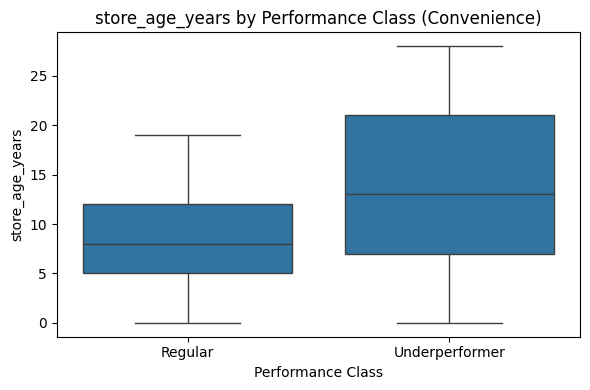

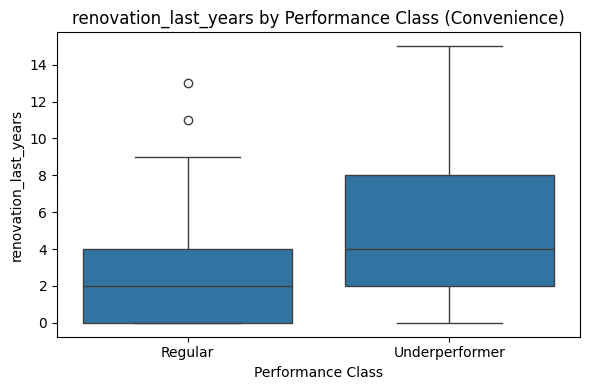

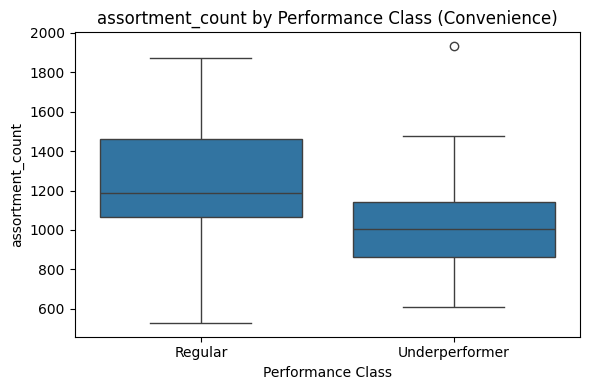


Store Format: Supermarket - Significant features: ['private_label_percent']


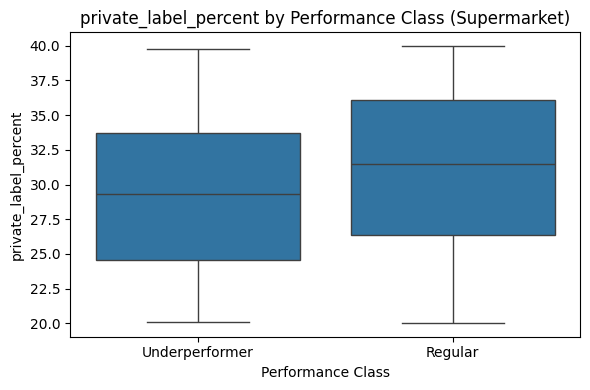


Store Format: Hypermarket - Significant features: ['staff_per_sqm']


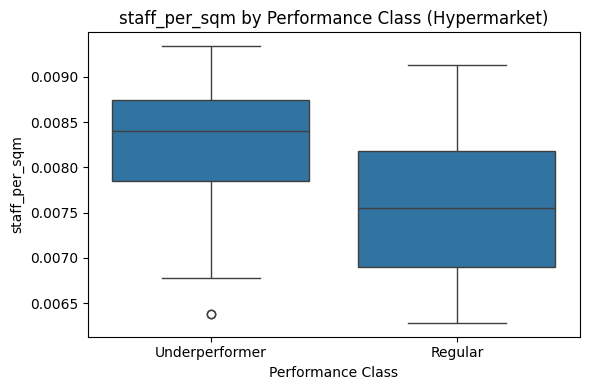


Store Format: Discounter - Significant features: ['store_area_sqm', 'staff_count', 'assortment_count']


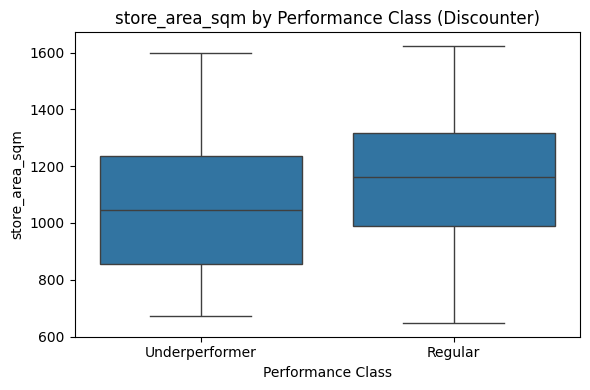

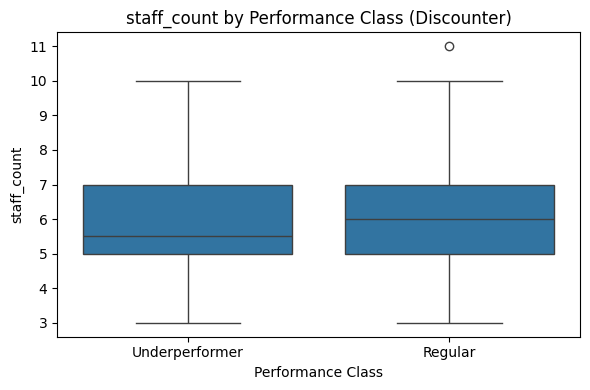

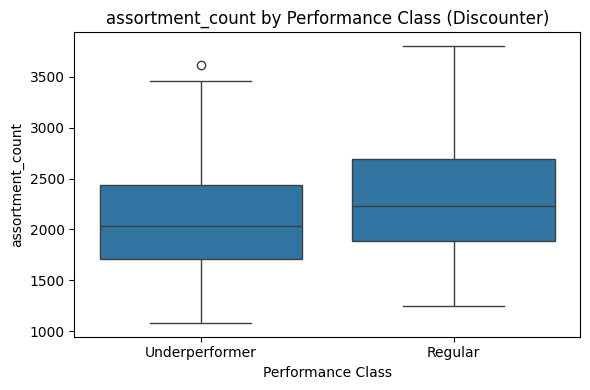

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

# Build combined_test from the original unscaled test features.
# X_test (unscaled) is assumed to be available from preprocessing.
combined_test = X_test.copy()
combined_test['store_id'] = store_ids_test.values
combined_test = combined_test.merge(
    performance_rf_info[['store_id', 'Performance_Class', 'store_format']],
    on='store_id',
    how='left'
)
print("Combined test data (unscaled) preview:")
print(combined_test.head())

# Identify numeric features for t-test analysis (exclude id and categorical columns).
exclude_cols = ['store_id', 'Performance_Class', 'store_format']
all_features = [col for col in combined_test.columns 
                if col not in exclude_cols and np.issubdtype(combined_test[col].dtype, np.number)]

# Run Welch's t-tests comparing Underperformers vs. Regular by store_format.
results = {}
for fmt in combined_test['store_format'].unique():
    subset = combined_test[combined_test['store_format'] == fmt].copy()
    group_under = subset[subset['Performance_Class'] == 'Underperformer']
    group_reg = subset[subset['Performance_Class'] == 'Regular']
    test_results = []
    for feature in all_features:
        if len(group_under) > 1 and len(group_reg) > 1:
            t_stat, p_value = ttest_ind(group_under[feature], group_reg[feature], equal_var=False)
            mean_diff = group_under[feature].mean() - group_reg[feature].mean()
            test_results.append({
                'Feature': feature,
                'T-Statistic': t_stat,
                'P-Value': p_value,
                'Underperformer_Mean': group_under[feature].mean(),
                'Regular_Mean': group_reg[feature].mean(),
                'Mean_Difference': mean_diff
            })
    results_df = pd.DataFrame(test_results).sort_values(by='P-Value')
    results[fmt] = results_df
    print(f"\nStore Format: {fmt}")
    print(results_df.head())

# Combine t-test results for preview.
combined_results = []
for fmt, df_res in results.items():
    df_res = df_res.copy()
    df_res['store_format'] = fmt
    combined_results.append(df_res)
combined_results_df = pd.concat(combined_results, ignore_index=True)
print("\nCombined T-Test Results by Store Format (preview):")
print(combined_results_df.sort_values(['store_format', 'P-Value']).head(10))

# Identify significant features (p < 0.05), excluding state and store format dummies.
significance_threshold = 0.05
signif_features_by_format = {}
for fmt in combined_test['store_format'].unique():
    subset_res = combined_results_df[
        (combined_results_df['store_format'] == fmt) & 
        (combined_results_df['P-Value'] < significance_threshold)
    ]
    features = subset_res['Feature'].unique()
    features = [feat for feat in features 
                if not (feat.startswith("federal_state_") or feat.startswith("store_format_"))]
    signif_features_by_format[fmt] = features

# Generate box plots for each significant feature using unscaled data.
for fmt, features in signif_features_by_format.items():
    if len(features) == 0:
        print(f"No significant features for store format '{fmt}'.")
        continue
    print(f"\nStore Format: {fmt} - Significant features: {features}")
    subset_data = combined_test[combined_test['store_format'] == fmt]
    for feat in features:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x='Performance_Class', y=feat, data=subset_data)
        plt.title(f"{feat} by Performance Class ({fmt})")
        plt.xlabel("Performance Class")
        plt.ylabel(feat)
        plt.tight_layout()
        plt.show()
